# Ford GoBike  data exploration
### Introduction
Ford GoBike is a bike sharing system in the San Francisco  Area
This document explores a dataset containing information about Trip duration,station names,user types,user birth year and other attributes for approximately 183412 bike ride in february 2019.

In [1]:
# import required packages needed to explore and plot dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
pd.set_option('mode.chained_assignment', None)


In [2]:
# Read data set into dataframe
gobike_df=pd.read_csv('fordgobike2019.csv')
gobike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,28/02/2019 17:32,01/03/2019 08:01,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,28/02/2019 18:53,01/03/2019 06:42,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,28/02/2019 12:13,01/03/2019 05:24,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,28/02/2019 17:54,01/03/2019 04:02,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,28/02/2019 23:54,01/03/2019 00:20,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
#create a copy of original data fram before starting data cleaning operations and exploring dataset columns data types
original_gobike=gobike_df.copy
gobike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

### What is the structure of your dataset?
the dataset contain 16 columns providing information about each bike ride  in february 2019 the data contain the follwing columns  :: 

duration_sec:: Trip Duration in seconds
start_time:: Trip Start Time
end_time:: Trip End Time 
start_station_id:: Trip Start Station ID
start_station_name:Trip Start Station Name
start_station_latitude::Trip Start Station Latitude
start_station_longitude::Trip Start Station Longitude
end_station_id::Trip End Station ID
end_station_name::Trip End Station Name
end_station_latitude::Trip End Station Latitude
end_station_longitude::Trip End Station Longitude
bike_id::Trip Bike ID
user_type:: User Type (Subscriber -> Registered Member :: Customer :Not a member or Casual User)
member_birth_year::  Year of Birth for Users
member_gender: Users Gender
bike_share_for_all_trip: Indicate weather or not the suers subscribed in low budget membership

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out what features are best for identifying the characterestics of users who massively using the bike service and their utilization time period and there prefered stations.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I will concentate in trip duration, age, user types and gender as i think I can generate the required information from these features.


## First I will explore the dataset for possible required cleaning steps 



### Data assesment

In [4]:
# data set columns structure
gobike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
# statistics of data set columns 
gobike_df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [6]:
# check columns containg null values 
gobike_df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

### Data clearing

In [7]:
# change data types of  start_time and end_time  to date and time formate
gobike_df.start_time = pd.to_datetime(gobike_df.start_time,errors='ignore')
gobike_df.end_time = pd.to_datetime(gobike_df.end_time,errors='ignore')

In [8]:
gobike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [9]:
#check for column have null values
gobike_df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [10]:
# drop raws that donot have birth year,gender,start_station,end_station data availiable 
gobike_df=gobike_df.dropna()
gobike_df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [11]:
# Adding age column using data in member_birh_year
gobike_df['member_birth_year']=gobike_df.member_birth_year.astype(int)
gobike_df['age']=2019 - gobike_df['member_birth_year']

In [12]:
# drop member_birth_year will not required any more
gobike_df.drop(columns=['member_birth_year'],inplace=True)
#drop Columns whch will not be required in current data analysis
gobike_df.drop(columns=['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude'],inplace=True)

In [13]:
# for analysis purposes duration will be calculated in minutes in an new int column
gobike_df['rid_time_in_minuites']=gobike_df['duration_sec']/60
gobike_df['rid_time_in_minuites']=gobike_df.rid_time_in_minuites.astype(int)

In [14]:
# for analysis purposes hourse will be calculated from start_time in an new int column
gobike_df['start_hour']=gobike_df['start_time'].dt.hour

In [15]:
#check outliers of some numircale columns (duration,age)
gobike_df[['age','rid_time_in_minuites']].describe(percentiles = [0.99])


,age,rid_time_in_minuites
count,174952.000000,174952.000000
mean,34.196865,11.241461
std,10.118731,27.371269
min,18.000000,1.000000
50%,32.000000,8.000000
99%,64.000000,52.000000
max,141.000000,1409.000000


From the above summary of the two column 99% of the age values is less tha 65 and also 99% of the trip duration is less than 55 minutes -----> so for better analysis raws with age >65 and trip duration >55 minutes will be dropped 

In [16]:
# dropping raws with  age >65 and trip duration >55 minutes
gobike_df=gobike_df[gobike_df.age<65]
gobike_df=gobike_df[gobike_df.rid_time_in_minuites<55]

In [17]:
# final data that will be explored 
gobike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171646 entries, 4 to 183411
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             171646 non-null  int64         
 1   start_time               171646 non-null  datetime64[ns]
 2   end_time                 171646 non-null  datetime64[ns]
 3   start_station_id         171646 non-null  float64       
 4   start_station_name       171646 non-null  object        
 5   end_station_id           171646 non-null  float64       
 6   end_station_name         171646 non-null  object        
 7   bike_id                  171646 non-null  int64         
 8   user_type                171646 non-null  object        
 9   member_gender            171646 non-null  object        
 10  bike_share_for_all_trip  171646 non-null  object        
 11  age                      171646 non-null  int32         
 12  rid_time_in_minu

## Gobike Exploration process 

## Univariate exploration 

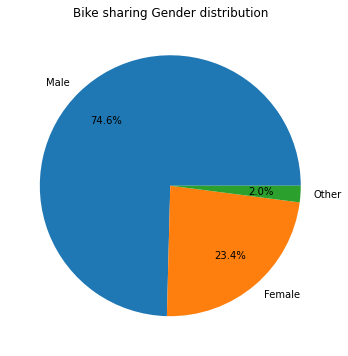

In [18]:
#exploring gender distribution for bike sharing service consumers
plt.subplots(figsize=(6,6))
gender=gobike_df['member_gender'].value_counts()
labels=gender.index
plt.title("Bike sharing Gender distribution")
plt.pie(x=gender,explode=None, autopct="%.1f%%", pctdistance=0.7,labels=labels);


#### From the provided pie chart Most of the bike sharing service consumers are men 74.6 of the sevice cutomers


Text(0, 0.5, 'Total users')

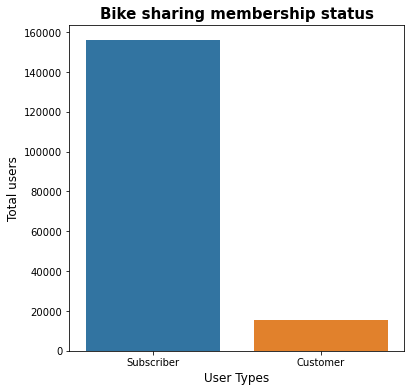

In [22]:
#exploring Membership status distribution for bike sharing service consumers
plt.subplots(figsize=(6,6))
ax =sns.countplot(x = 'user_type', data=gobike_df )
ax.set_title('Bike sharing membership status',fontsize = 15, fontweight='bold')
ax.set_xlabel('User Types', fontsize = 12)
ax.set_ylabel('Total users', fontsize = 12)
#for rect in ax.patches:
 #   ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.70,rect.get_height(),horizontalalignment='center', fontsize = 13)


Most of the bike sharing consumers are subscribed for the service

Text(0.5, 1.0, 'Age ststistics of the bikeshare service consumers')

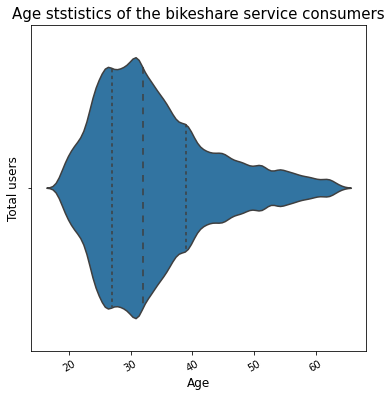

In [20]:
#exploring  the age ststistics of the bikeshare service consumers 
plt.subplots(figsize=(6,6))
base_color = sns.color_palette()[0]
sns.violinplot(data=gobike_df, x='age', color=base_color, inner='quartile')
plt.xticks(rotation=30);
plt.xlabel ('Age',fontsize = 12);
plt.ylabel ('Total users',fontsize = 12);
plt.title('Age ststistics of the bikeshare service consumers',fontsize = 15)

##### The violin plot of the age column data  clearly provide that the age of most bikeshare service consumer between 30 and 40 and the minimum age is almost 20 

Text(0.5, 0, 'Total users')

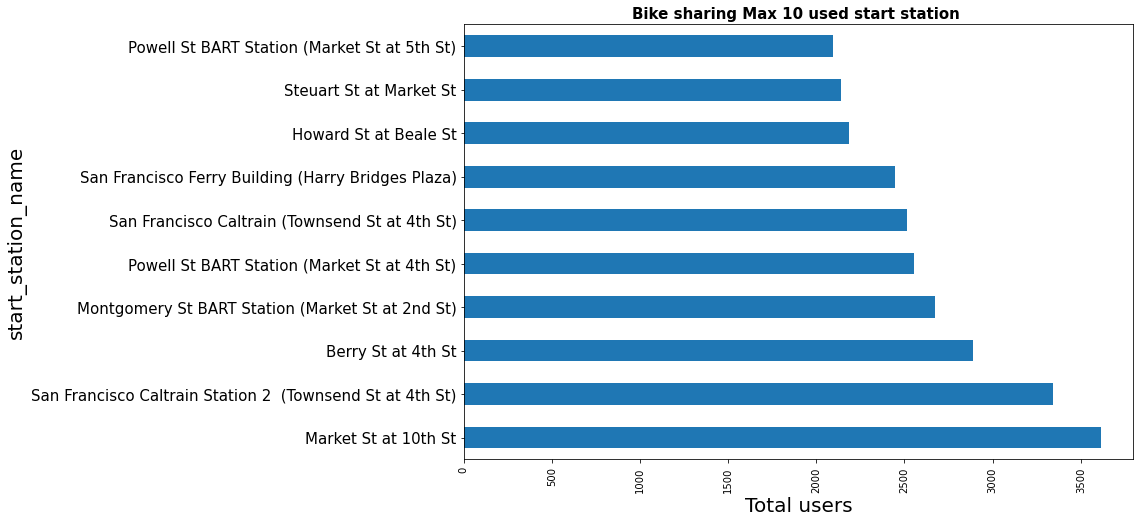

In [46]:
# exploring the most used start statation
plt.subplots(figsize=(12,8))
st_use_count=gobike_df['start_station_name'].value_counts(sort=True)
st_maxused=st_use_count.head(10)
plt.xticks(rotation=90);
plt.yticks(fontsize = 15);
ax = st_maxused.plot.barh(x =st_maxused.values , y = st_maxused.index, color=base_color)
ax.set_title('Bike sharing Max 10 used start station ',fontsize = 15, fontweight='bold')
ax.set_ylabel('start_station_name', fontsize = 20)
ax.set_xlabel('Total users', fontsize = 20)
#for rect in ax.patches:
 #  ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.70,rect.get_height(),horizontalalignment='center', fontsize = 18)


#### From the horizontal bar chart the most common used start station is Market St at 10th St

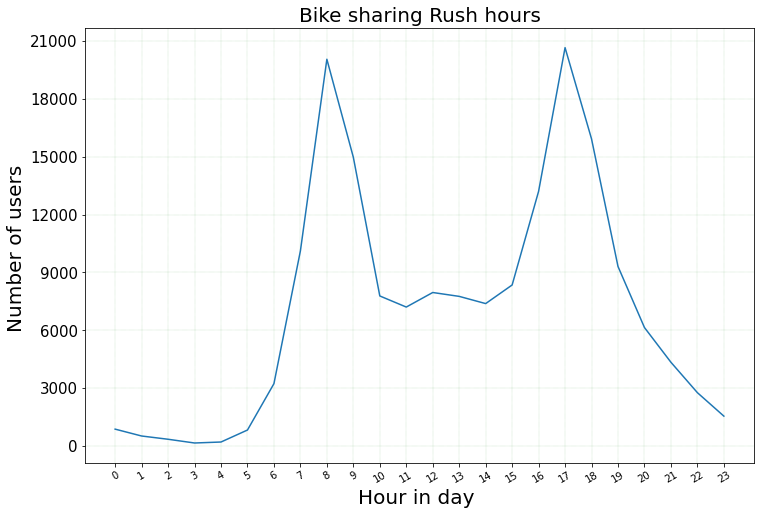

In [44]:
# exploring the rushhour of bikesharing service in a day
plt.subplots(figsize=(12,8))
rush=gobike_df['start_hour'].value_counts(sort=False)
x=rush.index
y=rush.values
plt.plot(x,y)
plt.xticks(np.arange(0, 24, step=1),rotation=30);
plt.xlabel("Hour in day ",fontsize = 20);
plt.ylabel("Number of users ",fontsize = 20);
plt.yticks(np.arange(0, 24000, step=3000),fontsize = 15);
plt.title("Bike sharing Rush hours",fontsize = 20)
plt.grid(color='g', linestyle='dotted', linewidth=.2)


#### From the line chart provide we can determine that the rush hours in the day is from 7 to 9 in the morning  and from 16-18  after noon

Text(0.5, 1.0, 'Trip duration histogram')

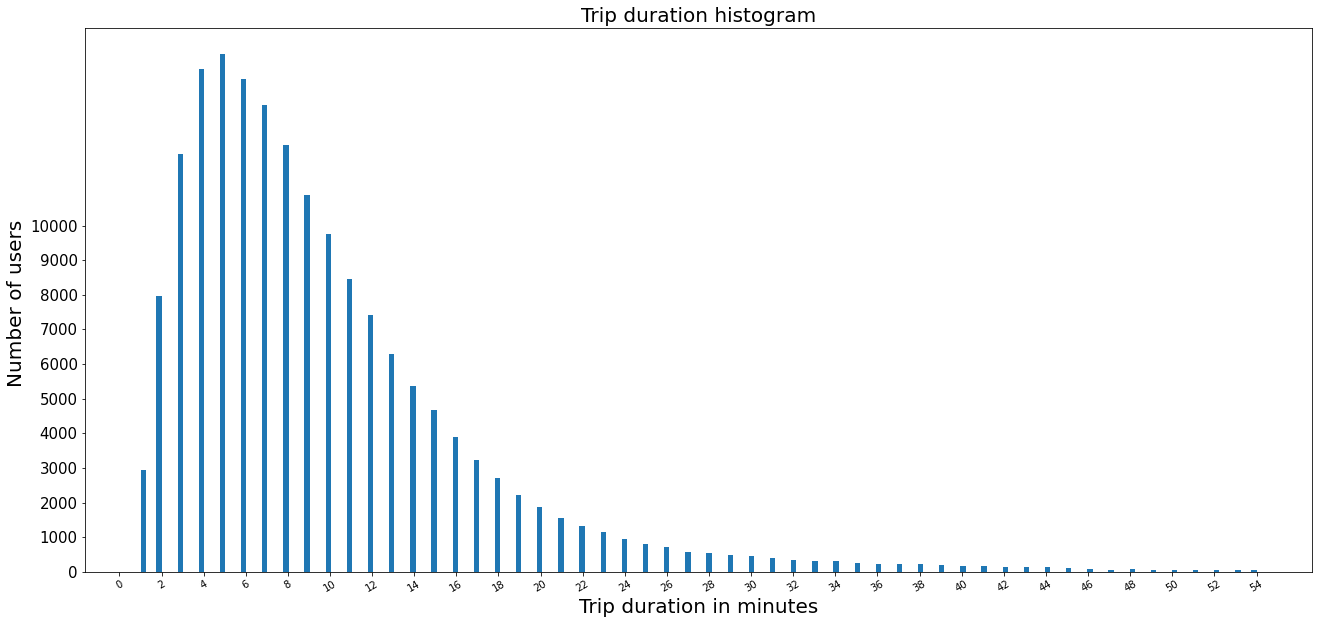

In [49]:
# Exploring trip duration in minutes 
counts, bins = np.histogram(gobike_df['rid_time_in_minuites'])
plt.subplots(figsize=(22,10))
plt.hist(gobike_df['rid_time_in_minuites'] ,bins='auto');
plt.xticks(np.arange(0, 56, step=2),rotation=30);
plt.xlabel("Trip duration in minutes",fontsize = 20);
plt.ylabel("Number of users ",fontsize = 20);
plt.yticks(np.arange(0, 11000, step=1000),fontsize = 15);
plt.title("Trip duration histogram",fontsize = 20)

#### From the histo gram of tripduration the most common Trip durattion  between 2 and 12 minutes for a ride 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
birth year : removed and replaced by age column
Age  :  99% of the age values is less than 65 --> I droped raws with values greater tha 65 considered it outliers
Duration : 99% of the trip duration is less than 55 minutes I droped raws with values greater than 55 minutes considered it outliers
Droped raws containing NAN values in Gender ,start_station_latitude' , 'start_station_longitude' , 'end_station_latitude' , and 'end_station_longitude during data cleaning.
Created column of start-hour from the original start_time column
Droped columns of start_station_latitude' , 'start_station_longitude' , 'end_station_latitude' , and 'end_station_longitude  as I will not need it in the current analysis
findings
Most of Ford Bike share service consumer is between 30 and 40 years old and the minimum age is almost 20 the maximum age after data cleaning is 64
Market St at 10th St is most commonoly used as start station for greater than 3600 service users
Most of the users have a common Trip durattion  between 2 and 12 minutes for a ride 
The rush hours of using Bike sharing service in the day is from 7 to 9 in the morning  and from 16-18  after noon
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
I droped raws with values greater tha 65 considered it outliers
I droped raws with values greater than 55 minutes considered it outliers
Droped columns of start_station_latitude' , 'start_station_longitude' , 'end_station_latitude' , and 'end_station_longitude  as I will not need it in the current analysis
Droped raws containing NAN values in Gender ,start_station_latitude' , 'start_station_longitude' , 'end_station_latitude' , and 'end_station_longitude during data cleaning it will have distorting effect in data exploration 

## Bivariate exploration

Text(0.5, 1.0, 'Relation between age and trip start hour')

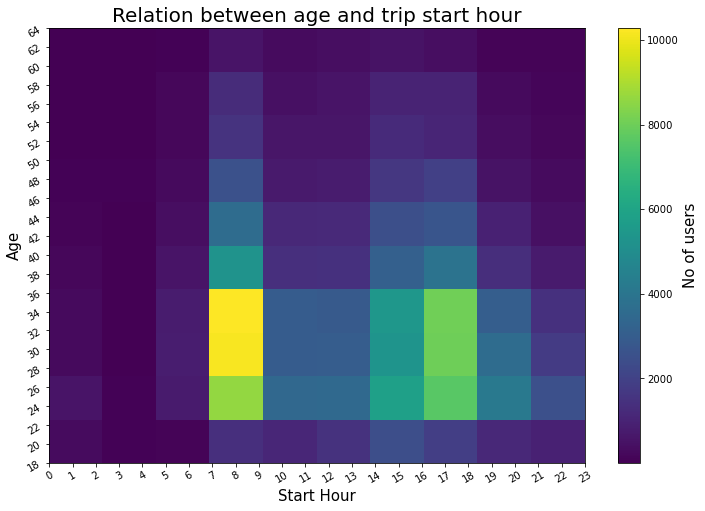

In [74]:
# check the possible relation between age and trip start hour
plt.subplots(figsize=(12,8))
plt.hist2d(data = gobike_df, x = 'start_hour', y = 'age');
plt.ylabel('Age',fontsize = 15)
plt.xlabel('Start Hour',fontsize = 15)
plt.xticks(np.arange(0, 24, step=1),rotation=30);
plt.yticks(np.arange(18, 66, step=2),rotation=30);
plt.colorbar().set_label('No of users', rotation=90,fontsize = 15)
plt.title("Relation between age and trip start hour",fontsize = 20)

##### From the heat map provided we can note that the ages between 28 and 36 is massively using bikeshare service from  7 to 9 am They use the of the service is decreasing in next day hours but it inncreasing again to high usage from 16 to 18 pm

Text(0.5, 1.0, 'Relation between average age and gender')

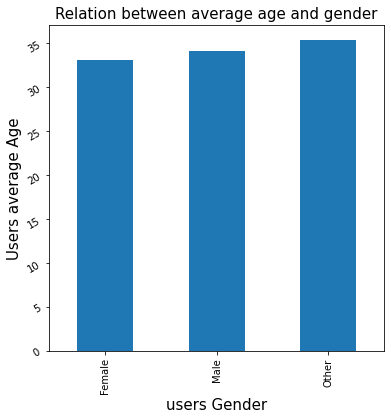

In [63]:
#discussing the average age of each gender 
plt.subplots(figsize=(6,6))
age_gender=gobike_df.groupby(["member_gender"])["age"].mean()
age_gender.plot.bar(x='member_gender',y='age')
plt.xlabel('users Gender',fontsize = 15)
plt.ylabel('Users average Age',fontsize = 15)
plt.yticks(np.arange(0, 40, step=5),rotation=30);
plt.title("Relation between average age and gender",fontsize = 15)

##### From the chart provided we observe that the average age of users genders is between 33 for women,35 for men and 36 for other

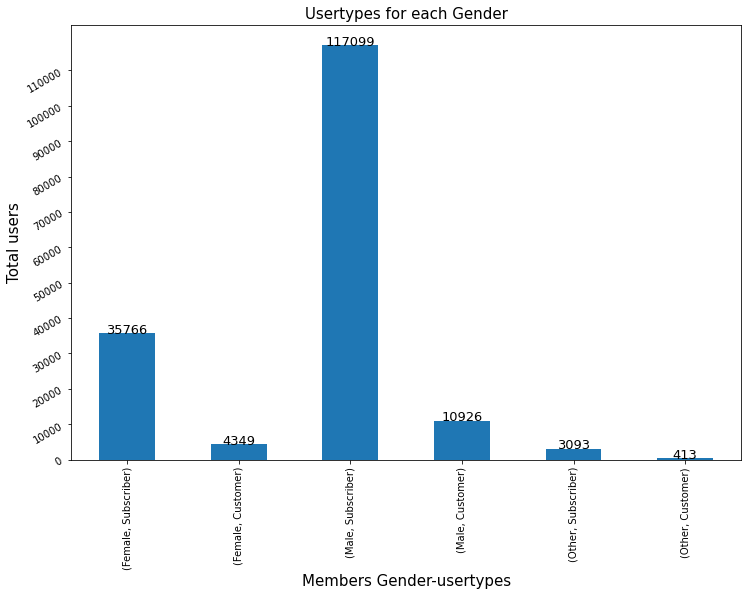

In [64]:
# exploring Gender distribution for each membership style
ax = gobike_df.groupby('member_gender')['user_type'].value_counts().plot(kind='bar', figsize=(12,8))
plt.xlabel('Members Gender-usertypes',fontsize = 15)
plt.ylabel('Total users',fontsize = 15)
plt.yticks(np.arange(0,120000, step=10000),rotation=30);
plt.title("Usertypes for each Gender",fontsize = 15)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.70,rect.get_height(),horizontalalignment='center', fontsize = 13)


##### From the bar chart we can note that  around 91% of men subscribing the bikeshare service 89% of women 88%of other genders 

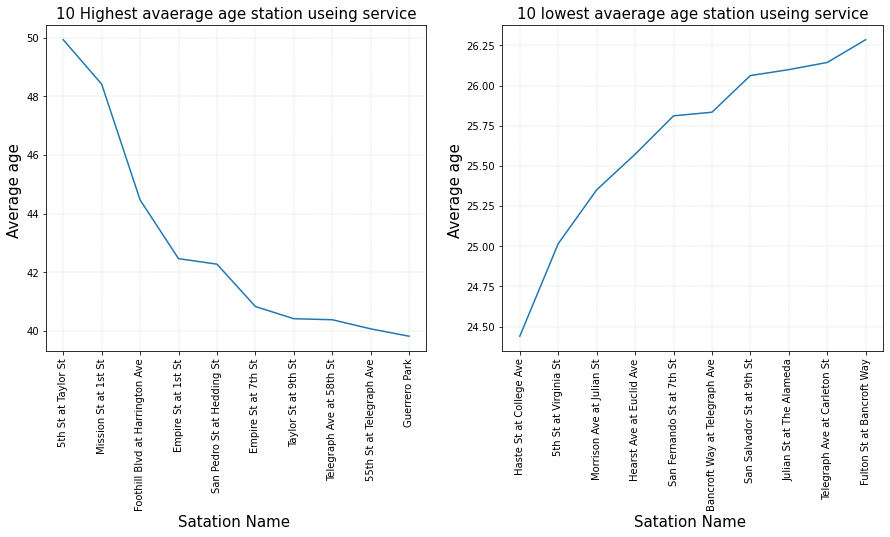

In [65]:
# exploring the stations that used by 10 highest avaerage age comapred to stations that used by the 10 lowest avaerage age of users
fig = plt.figure( figsize=(15,6))
hi_age_station=gobike_df.groupby(["start_station_name"])["age"].mean().nlargest(10)
ax=fig.add_subplot(121)
x=hi_age_station.index
y=hi_age_station.values
plt.plot(x,y)
plt.xticks(rotation=90);
plt.grid(color='g', linestyle='dotted', linewidth=.2)
plt.xlabel("Satation Name ",fontsize = 15);
plt.ylabel("Average age ",fontsize = 15);
plt.title("10 Highest avaerage age station useing service",fontsize = 15)
low_age_station=gobike_df.groupby(["start_station_name"])["age"].mean().nsmallest(10)
ax=fig.add_subplot(122)
x=low_age_station.index
y=low_age_station.values
plt.plot(x,y)
plt.xlabel("Satation Name ",fontsize = 15);
plt.ylabel("Average age ",fontsize = 15);
plt.xticks(rotation=90);
plt.title("10 lowest avaerage age station useing service",fontsize = 15)
plt.grid(color='g', linestyle='dotted', linewidth=.2)


##### From the line plots we note that 5th St at Tylor St station have an average users age of 50 years however Haste ST at College Ave station have an average user age of 24.5 years  

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The ages between 28 and 36 is massively using bikeshare service from  7 to 9 am They use the of the service is decreasing in next day hours but it inncreasing again to high usage from 16 to 18 pm
The average age of users genders is between 33 for women,35 for men and 36 for other
Around 91% of men subscribing the bikeshare service 89% of women 88%of other genders 
5th St at Tylor St station have an average users age of 50 years however Haste ST at College Ave station have an average user age of 24.5 years  

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
NO

# Multivariate Exploration


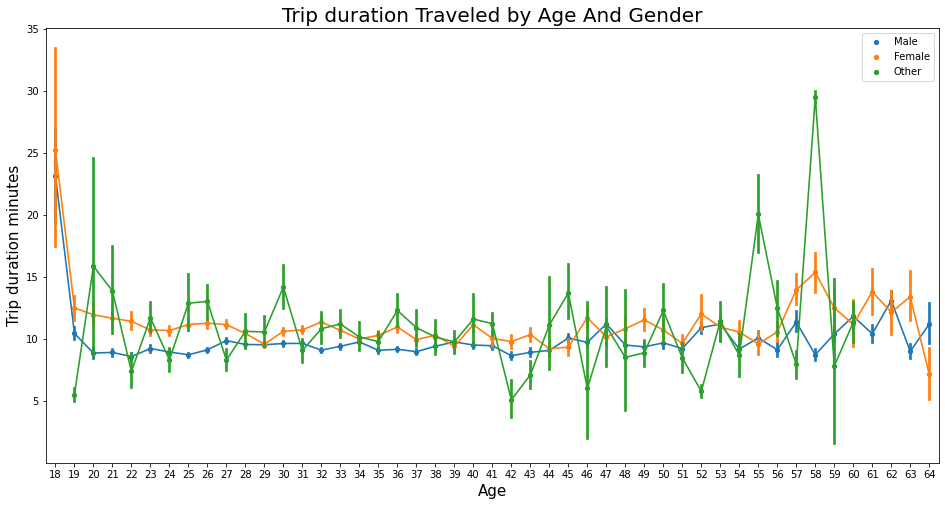

In [69]:
#Exploring relation between members gender vs age and trip duration in minutes

plt.figure(figsize=(16,8))
ax = sns.pointplot(x='age', y='rid_time_in_minuites', hue='member_gender', scale=.6, data=gobike_df)
plt.title('Trip duration Traveled by Age And Gender', fontsize=20)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Trip duration minutes',  fontsize=15)
leg = ax.legend()
ax = plt.gca();


##### The chart providing us multiple insights
1- Young females 18 years old have trip duration between 18 and 36 minutes
2- Males in all ages have trip duration between 8 and 13 minutes 
3- users who didnot provide there gender or choose other gender there trip duration was between 5 and 15 most of the time decreasing to 2 minutes and increasing to reach 32 minutes in defined ages 

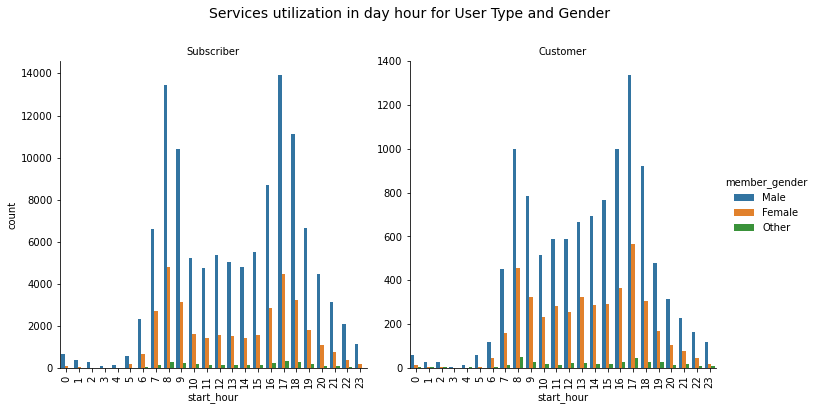

In [67]:
# exploring gender and usertype services utilization in each hour of the day
ax1 = sns.catplot(data=gobike_df, x='start_hour', col="user_type", hue="member_gender", kind='count', sharey = False )
ax1.set_titles("{col_name}")
ax1.fig.suptitle('Services utilization in day hour for User Type and Gender', y=1.08, fontsize=14)
ax1.set_xticklabels(rotation=90);

##### From the catplot  chart provided the following points can be noticed 
1- Male subscriber using the service more frequently than Female and other genders in all day hours
2- Female subscriber use the services more frequently than other gender in all day hours
3- the same roles existed in customers
4- For all genders the rush hours for both subscriber and customers is from 8 to 9 am and 16 to 18 after noon 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
##### The point plot  chart providing us multiple insights
1- Young females 18 years old have trip duration between 18 and 36 minutes
2- Males in all ages have trip duration between 8 and 13 minutes 
3- users who didnot provide there gender or choose other gender there trip duration was between 5 and 15 most of the time decreasing to 2 minutes and increasing to reach 32 minutes in defined ages 

#### From the catplot chart provided the following points can be noticed 
1- Male subscriber using the service more frequently than Female and other genders in all day hours
2- Female subscriber use the services more frequently than other gender in all day hours
3- the same roles existed in customers
4- For all genders the rush hours for both subscriber and customers is from 8 to 9 am and 16 to 18 after noon 


In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Ford gobike main.ipynb'])

1